In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
from hist.stack import Stack

sys.path.append("../..")
from HistogramLib.store import HistogramStore
from HistogramLib.plot_manager import PlotManager
from HistogramLib.bokeh.histogram_widget import *
from hists.parameters import beamEnergies, synchrotronBeamEnergiesMap
from hists.store import HistogramId
from bokeh_apps.widgets import *

In [2]:
hist_folder = '/grid_mnt/data_cms_upgrade/cuisset/testbeam18/clue3d/v33'
histStore = HistogramStore(hist_folder, HistogramId)

In [3]:
def getClue3DProjected(datatype, beamEnergy):
    return (
        histStore.get(HistogramId("Clus3DClusteredEnergy", "cmssw", datatype))
        .getHistogram(HistogramKind.COUNT)
        [{"beamEnergy":hist.loc(beamEnergy), "mainOrAllTracksters":hist.loc("mainTrackster")}]
        .project("clus3D_energy")
    )
def getClue2DProjected(datatype, beamEnergy):
    return (
        histStore.get(HistogramId("EnergyClustered2DPerEvent", "cmssw", datatype))
        .getHistogram(HistogramKind.COUNT)
        [{"beamEnergy":hist.loc(beamEnergy)}]
        .project("clus2D_energy_sum")
    )
def getRechitsProjected(datatype, beamEnergy):
    return (
        histStore.get(HistogramId("RechitsTotalEnergyPerEvent", "cmssw", datatype))
        .getHistogram(HistogramKind.COUNT)
        [{"beamEnergy":hist.loc(beamEnergy)}]
        .project("rechits_energy_sum")
    )

In [4]:
histStore.get(HistogramId("RechitsTotalEnergyPerEvent", "cmssw", "data")).getHistogram(HistogramKind.COUNT)

Hist(
  IntCategory([20, 30, 50, 80, 100, 120, 150, 200, 250, 300], name='beamEnergy', label='Beam energy (GeV)'),
  Regular(2000, 0, 350, name='rechits_energy_sum', label='Total reconstructed energy per event (GeV)'),
  storage=Double()) # Sum: 281869.0 (281873.0 with flow)

In [22]:
def plot(datatype, beamEnergy, xLim=None, rebin=None):
    plt.figure()
    if xLim is None:
        xLim = synchrotronBeamEnergiesMap[beamEnergy] - 40, synchrotronBeamEnergiesMap[beamEnergy]+10
    plt.xlim(xLim)
    hists = [getRechitsProjected(datatype, beamEnergy), getClue2DProjected(datatype, beamEnergy), getClue3DProjected(datatype, beamEnergy)]
    if rebin is not None:
        for i in range(len(hists)):
            hists[i] = hists[i][::hist.tag.rebin(rebin)]
    hep.histplot(hists, 
        yerr=False, label=["Reco", "CLUE", "CLUE3D"] #["Energy reconstructed", "Energy clustered by CLUE", "Energy clustered by CLUE3D"]
        )
    plt.ylabel("Event count")
    hep.cms.text("Preliminary")
    hep.cms.lumitext("Test beam $e^+$ "+ str(beamEnergy) + " GeV")
    plt.legend(loc='upper left')
    plt.show()

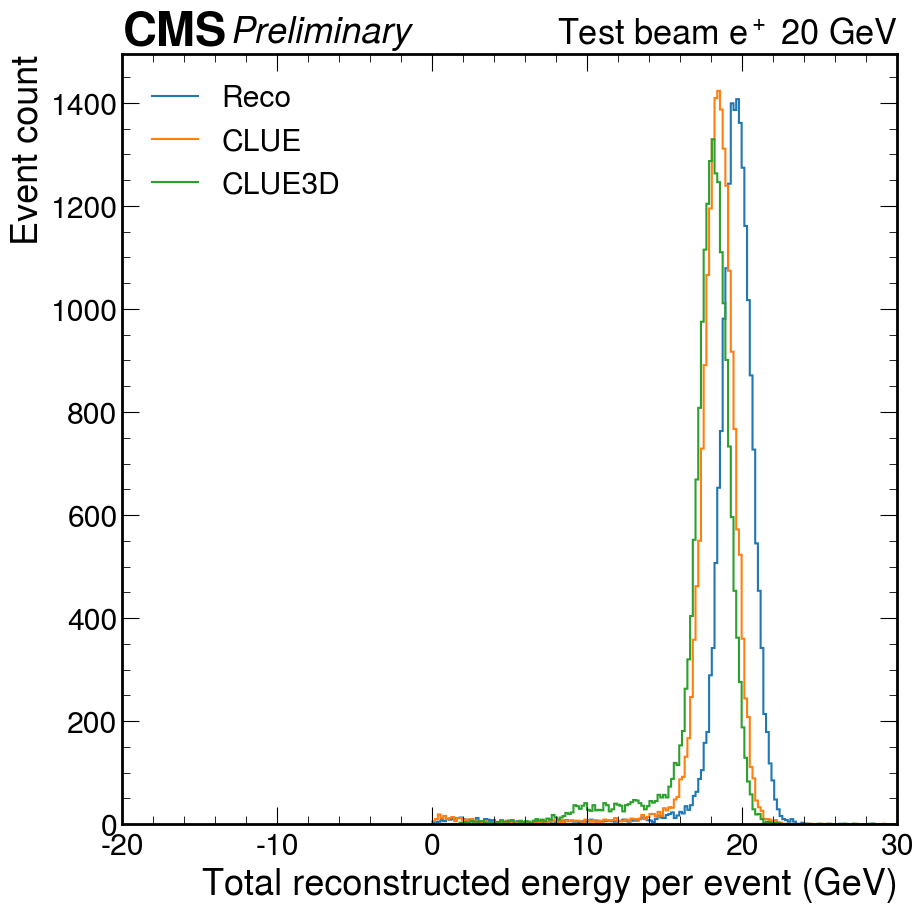

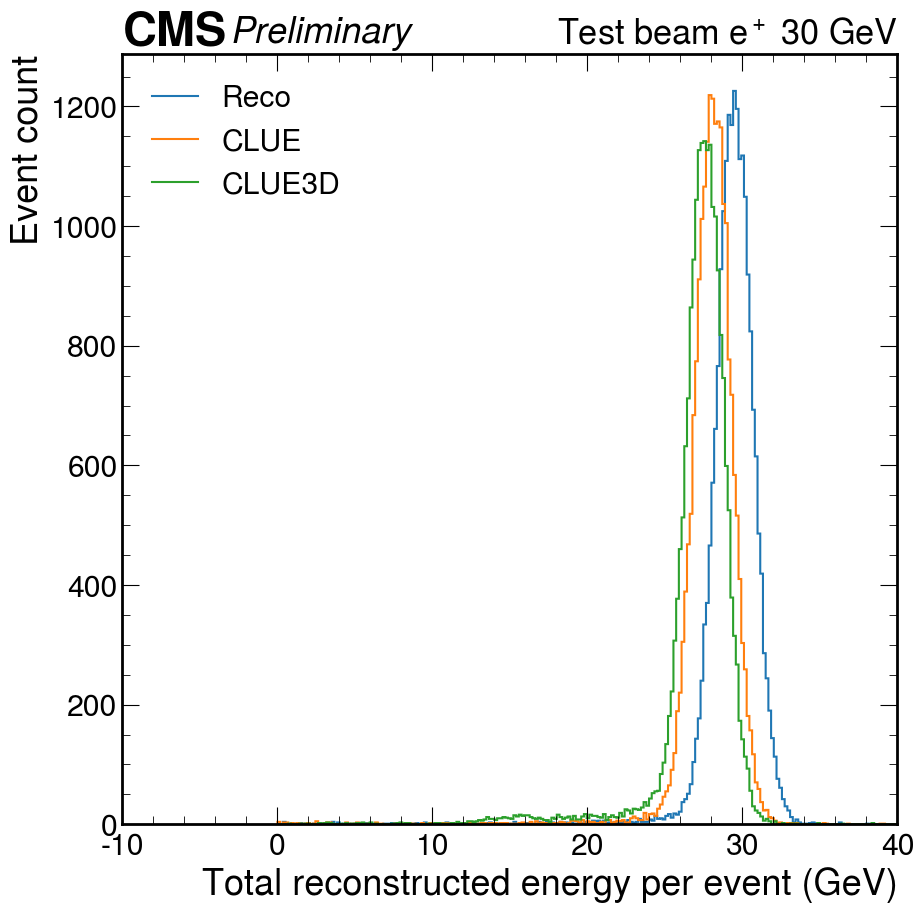

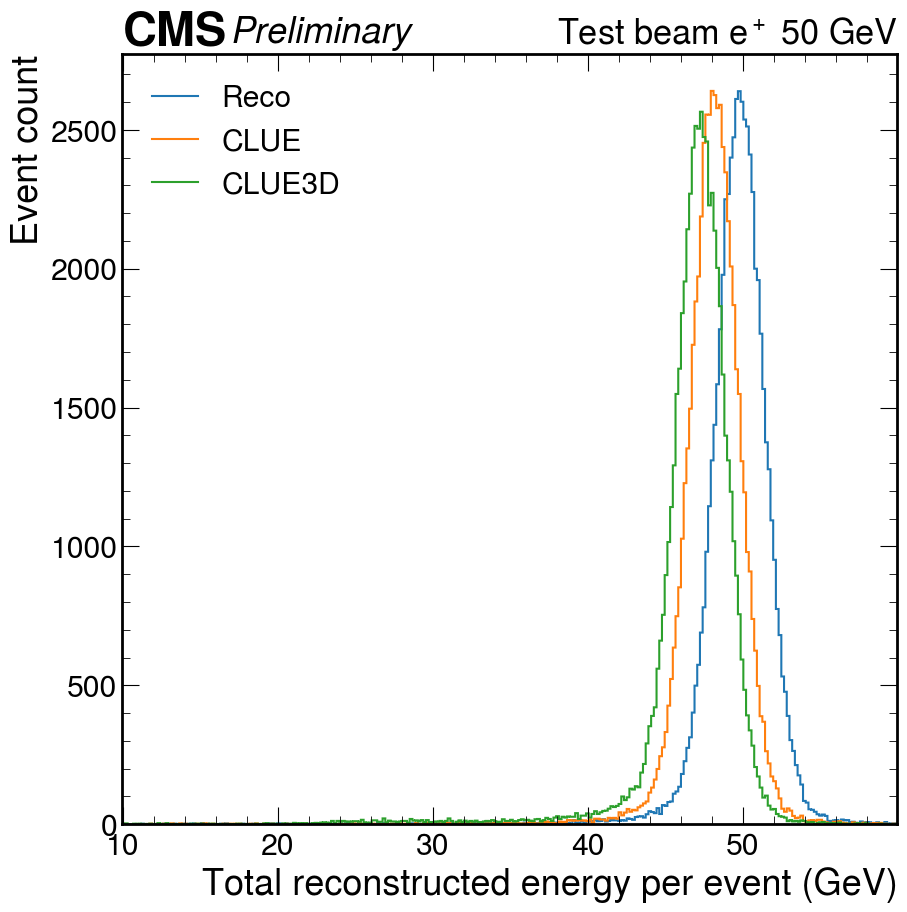

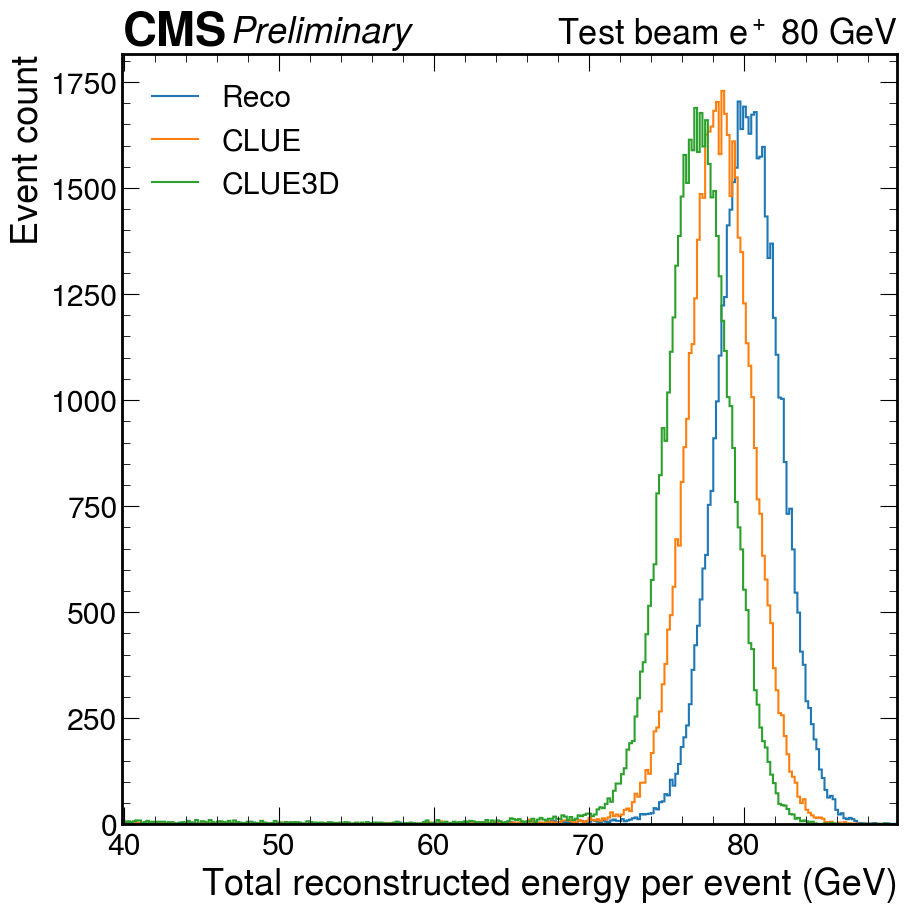

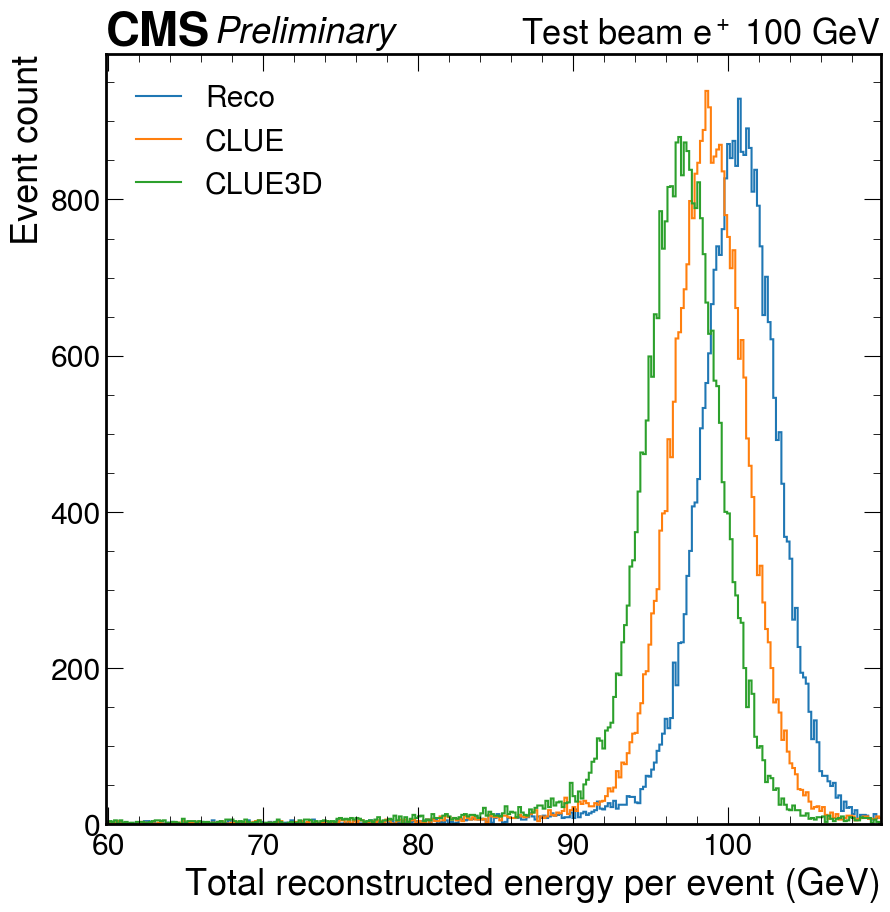

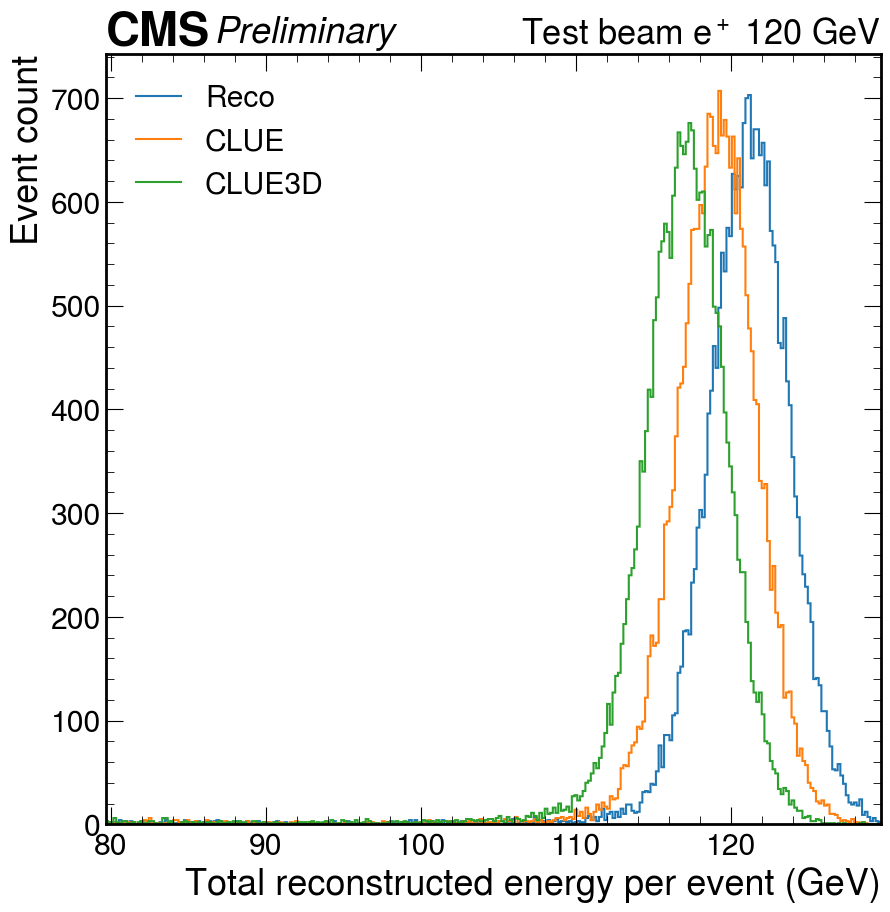

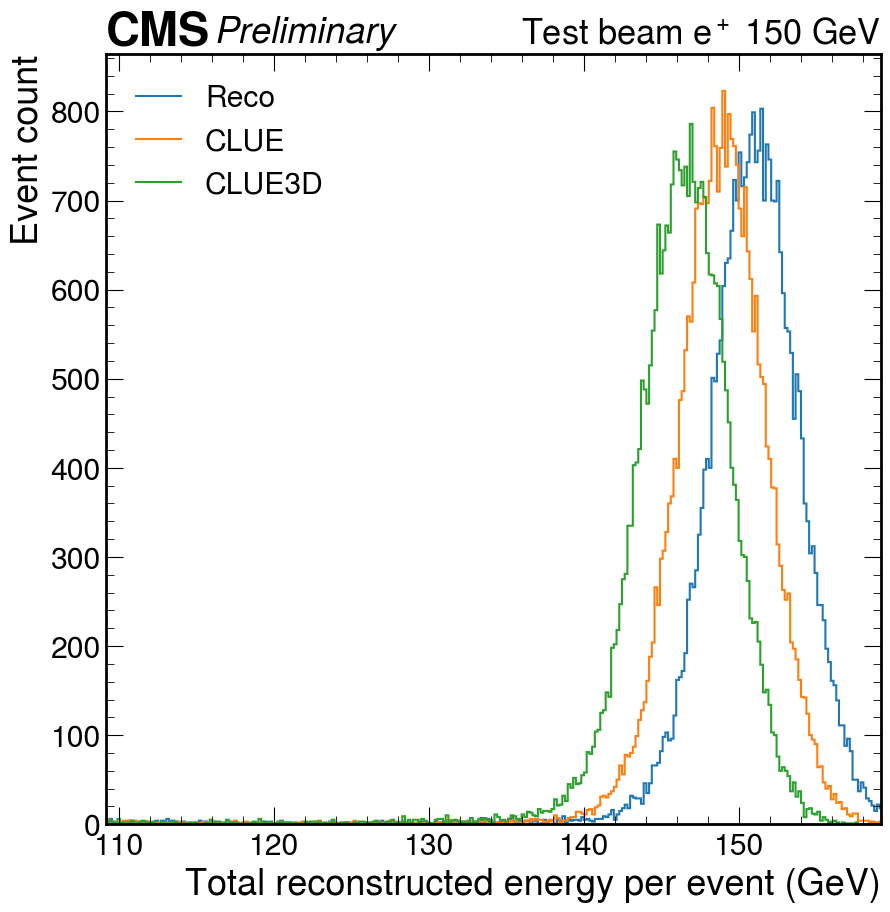

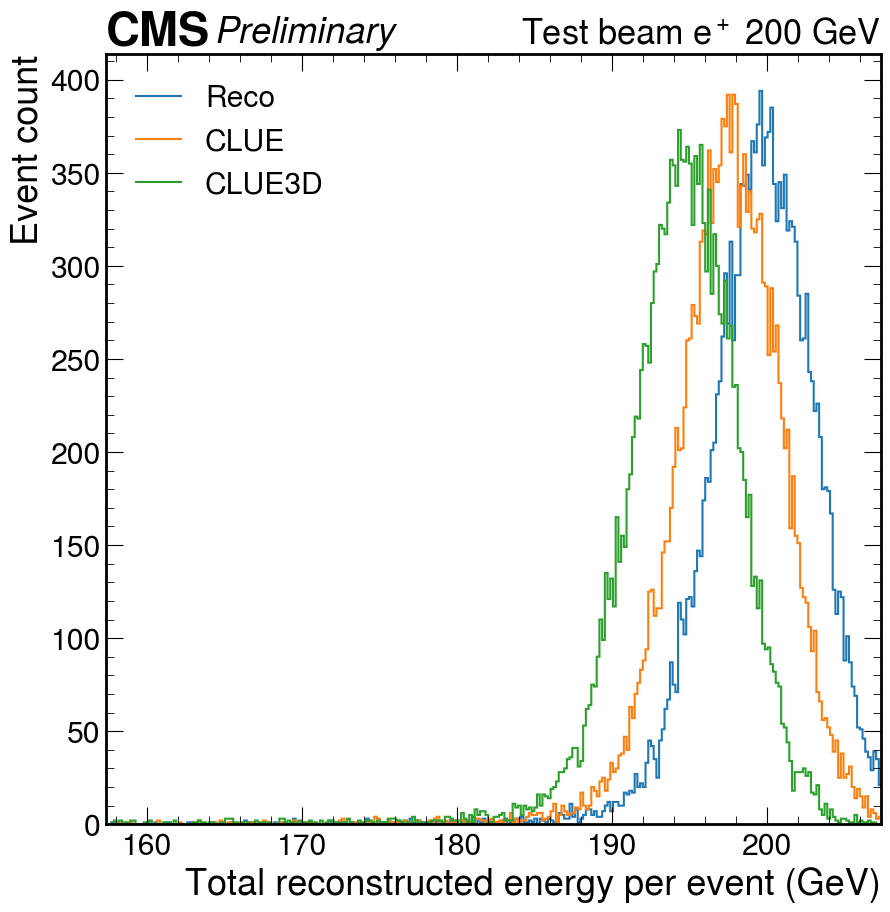

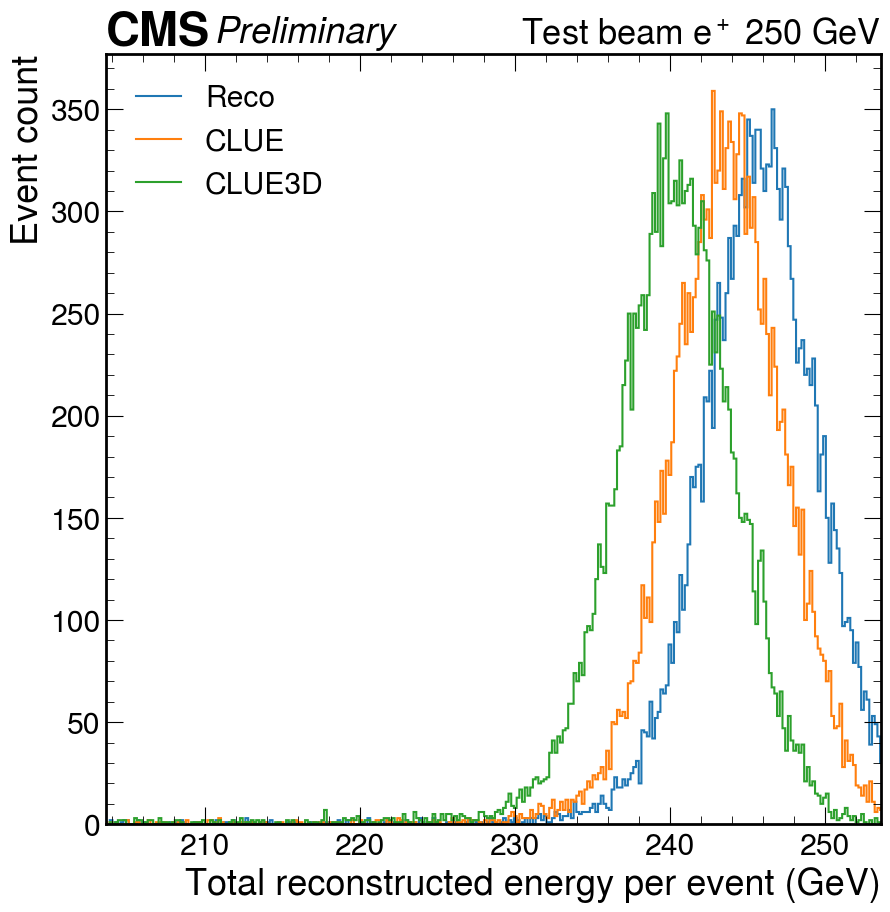

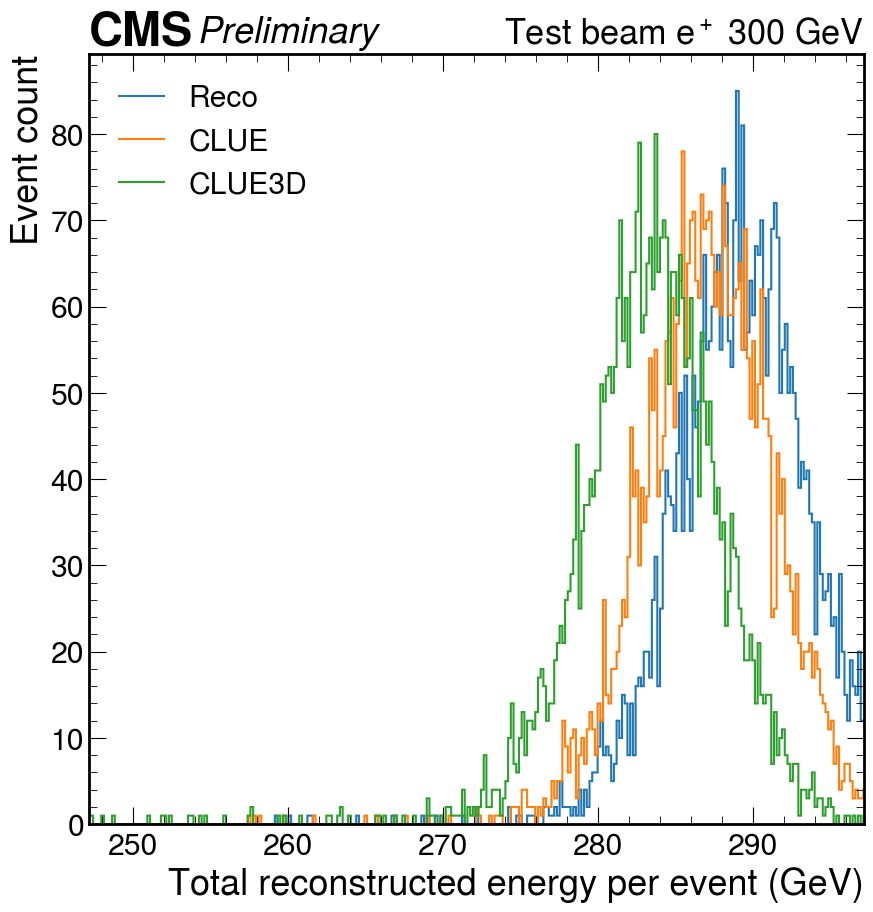

In [23]:
for beamEnergy in beamEnergies:
    plot("data", beamEnergy)

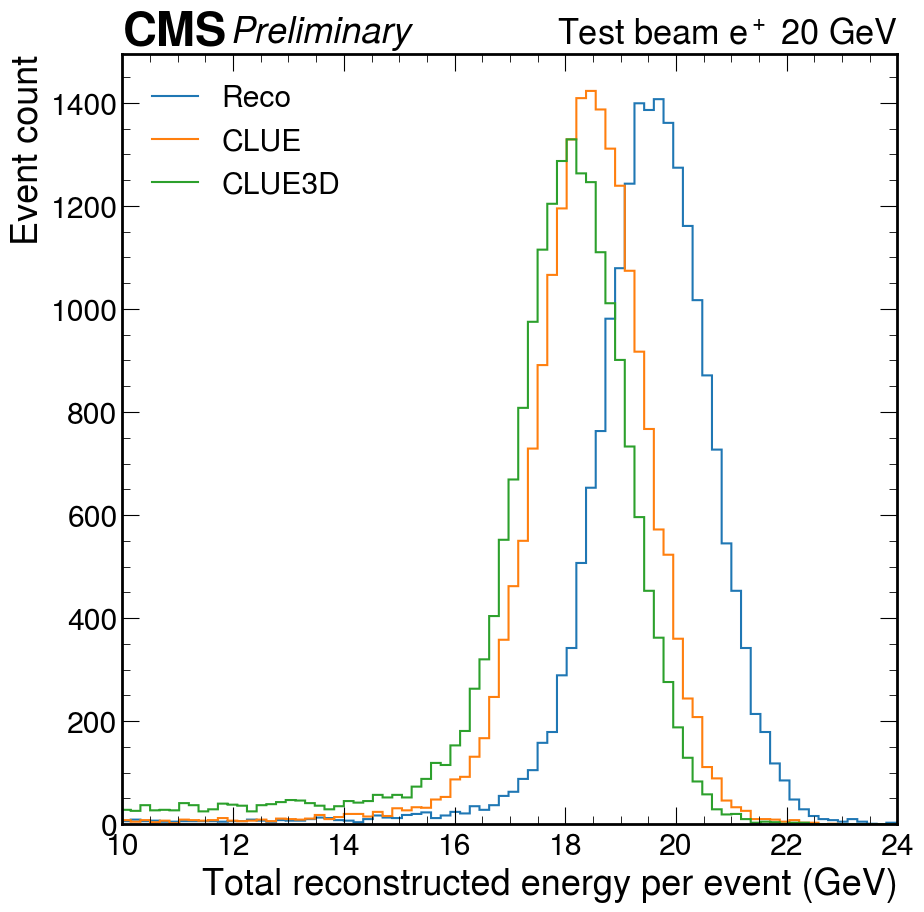

In [20]:
plot("data", 20, (10, 24))

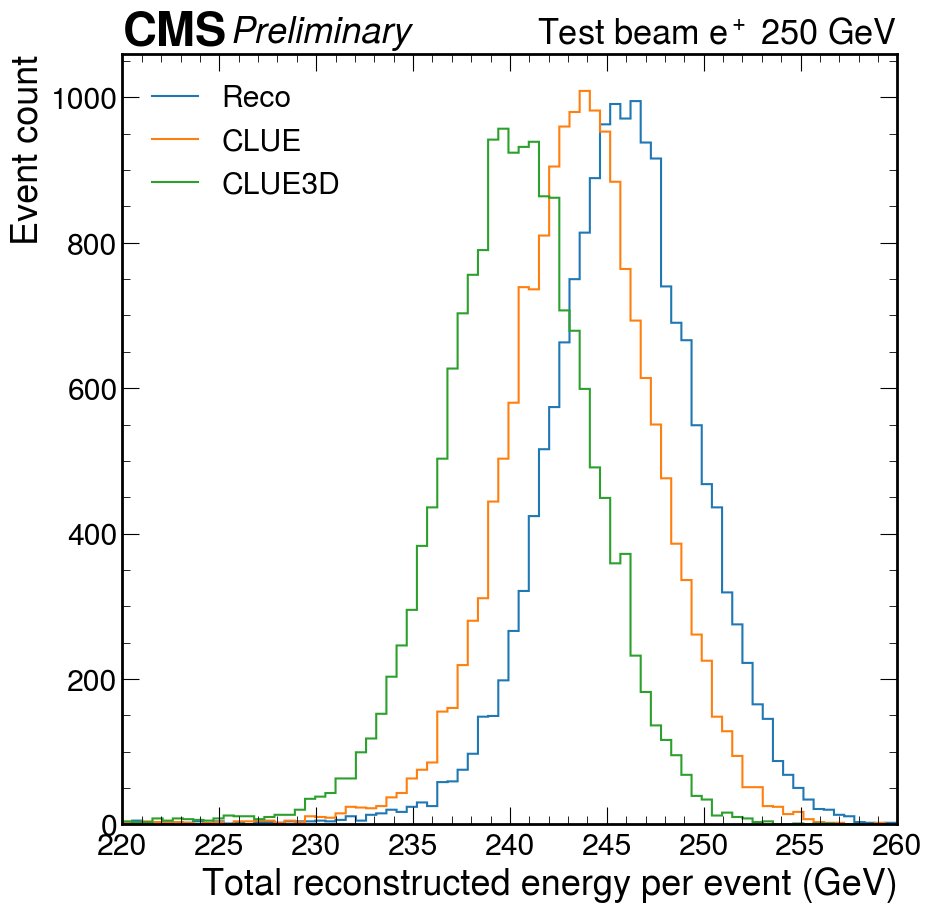

In [25]:
plot("data", 250, (220, 260), rebin=3)